### 使用RandomForestClassifier

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report

Data Collection

In [2]:
# Load the dataset
data= pd.read_csv('Win_Lose_Data.csv')
data

,match_api_id,team_api_id,team_type,spread,status,fire,water,earth,air,Aries,...,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius,TeamGoal
0,836306,8640,home,10,win,3,1,2,5,1,...,1,0,0,0,1,1,3,1,1,10
1,2030233,8633,home,8,win,3,4,3,1,1,...,3,0,1,1,1,1,0,0,1,10
2,658797,8586,home,8,win,4,1,1,5,2,...,0,1,0,0,0,1,0,1,4,9
3,840289,9925,home,9,win,3,3,1,4,1,...,1,0,2,1,0,0,0,0,4,9
4,1239709,9823,home,7,win,3,1,3,4,1,...,0,1,0,0,2,1,0,3,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31947,2216664,8429,away,1,lose,2,3,4,2,1,...,2,0,1,2,0,2,1,1,0,0
31948,2216666,8485,away,1,lose,4,4,2,1,2,...,2,1,1,0,1,1,0,0,1,0
31949,2216667,8284,home,4,lose,4,4,0,3,1,...,0,1,3,0,0,0,0,1,2,0
31950,2216670,8485,away,4,lose,3,5,2,1,2,...,2,2,1,0,1,1,0,0,1,0


In [3]:
# Convert 'status' column to binary (win = 1, lose and draw = 0)
data['status'] = data['status'].apply(lambda x: 1 if x == 'win' else 0)

In [4]:
# number of rows & columns in the dataset
data.shape

(31952, 22)

In [5]:
# first 5 rows of the dataset
data.head()

,match_api_id,team_api_id,team_type,spread,status,fire,water,earth,air,Aries,...,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius,TeamGoal
0,836306,8640,home,10,1,3,1,2,5,1,...,1,0,0,0,1,1,3,1,1,10
1,2030233,8633,home,8,1,3,4,3,1,1,...,3,0,1,1,1,1,0,0,1,10
2,658797,8586,home,8,1,4,1,1,5,2,...,0,1,0,0,0,1,0,1,4,9
3,840289,9925,home,9,1,3,3,1,4,1,...,1,0,2,1,0,0,0,0,4,9
4,1239709,9823,home,7,1,3,1,3,4,1,...,0,1,0,0,2,1,0,3,1,9


In [4]:
# checking for missing values
data.isnull().sum()

match_api_id    0
team_api_id     0
team_type       0
spread          0
status          0
fire            0
water           0
earth           0
air             0
Aries           0
Leo             0
Sagittarius     0
Cancer          0
Scopio          0
Pisces          0
Taurus          0
Virgo           0
Capricorn       0
Gemini          0
Libra           0
Aquarius        0
TeamGoal        0
dtype: int64

In [5]:
# Select the zodiac sign columns (F to U) and the win rate column (E)
zodiac_columns = ['Aries', 'Leo', 'Sagittarius', 'Cancer', 'Scopio', 'Pisces', 'Taurus', 'Virgo', 'Capricorn', 'Gemini', 'Libra', 'Aquarius']
target_column = 'status'

zodiac_columns

['Aries',
 'Leo',
 'Sagittarius',
 'Cancer',
 'Scopio',
 'Pisces',
 'Taurus',
 'Virgo',
 'Capricorn',
 'Gemini',
 'Libra',
 'Aquarius']

Correlation

In [8]:
# Calculate correlation matrix
correlation_matrix = data[zodiac_columns + [target_column]].corr()

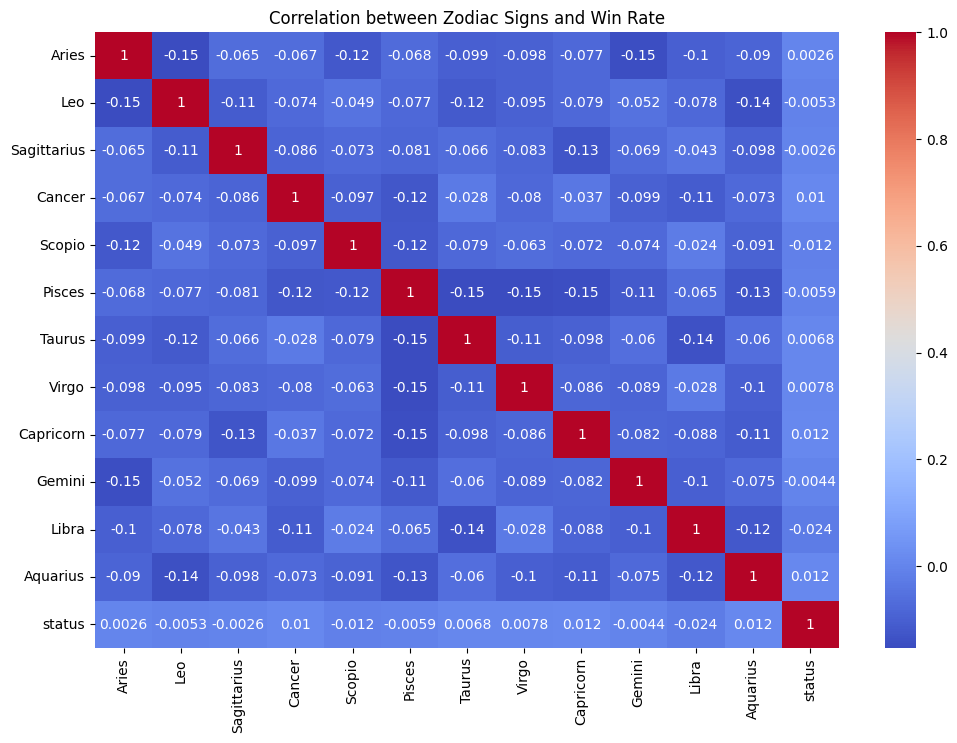

In [9]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Zodiac Signs and Win Rate')
plt.show()

Train & Test Split

In [7]:
# Splitting the dataset into features (X) and target (Y)
X = data[zodiac_columns]
Y = data[target_column]

print("Class distribution in the dataset:\n", data[target_column].value_counts())


Class distribution in the dataset:
 status
1    15976
0    15976
Name: count, dtype: int64


In [8]:
# Splitting the data with stratification to ensure class distribution is similar in both sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Checking the distribution in the training and testing sets
train_distribution = Y_train.value_counts()
test_distribution = Y_test.value_counts()

print("Class distribution in training set:\n", train_distribution)
print("Class distribution in testing set:\n", test_distribution)


Class distribution in training set:
 status
1    12781
0    12780
Name: count, dtype: int64
Class distribution in testing set:
 status
0    3196
1    3195
Name: count, dtype: int64


Model Training:

Random Forest Classifier

In [9]:
# Training the model using RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

confusion_matrix

In [10]:
# Prediction and Evaluation
X_test_prediction = random_forest_model.predict(X_test)
report = classification_report(Y_test, X_test_prediction, output_dict=True)

# Extracting specific performance metrics
category_0_precision = report['0']['precision']
category_0_recall = report['0']['recall']
category_0_f1 = report['0']['f1-score']

category_1_precision = report['1']['precision']
category_1_recall = report['1']['recall']
category_1_f1 = report['1']['f1-score']

overall_accuracy = report['accuracy']

print(f"Loss - Precision: {category_0_precision:.2f}, Recall: {category_0_recall:.2f}, F1 Score: {category_0_f1:.2f}")
print(f"Win - Precision: {category_1_precision:.2f}, Recall: {category_1_recall:.2f}, F1 Score: {category_1_f1:.2f}")
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Loss - Precision: 0.53, Recall: 0.53, F1 Score: 0.53
Win - Precision: 0.53, Recall: 0.52, F1 Score: 0.52
Overall Accuracy: 0.53


In [11]:
# accuracy on test data
X_test_prediction = random_forest_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy : ',test_data_accuracy)

Accuracy :  0.5252699108120795


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate precision, recall, F1 score, and overall accuracy
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)
accuracy = accuracy_score(Y_test, X_test_prediction)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Overall Accuracy: {accuracy:.2f}")

Precision: 0.53
Recall: 0.52
F1 Score: 0.52
Overall Accuracy: 0.53


Building a Predictive System

In [13]:
# Define the input data: counts of each zodiac sign in a team
input_data = (1, 1, 1, 1, 0, 0, 0, 1, 1, 3, 1, 1)

# Convert the input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data for predicting the label for only one instance
# The model expects the input to be two-dimensional, hence the reshape
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Use the model to make a prediction
# The predict method will return an array of predictions
prediction = random_forest_model.predict(input_data_reshaped)
print(prediction)

# Output 'Win' or 'Lose' based on the prediction
# prediction[0] is the predicted label for the first (and only) instance
if prediction[0] == 1:
    print('Win')
else:
    print('Lose')



[1]
Win


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


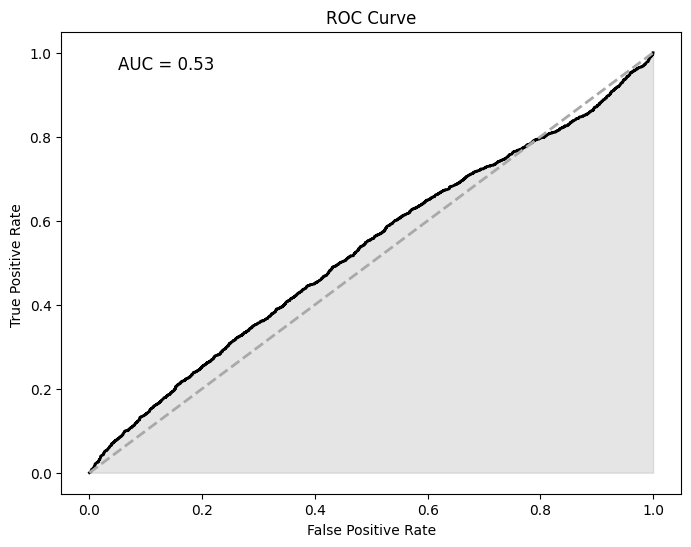

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2)  # Change the line color to black
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='grey')  # Fill the area under the curve
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')  # Diagonal dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('ROC Curve')

# Display AUC on the plot
plt.text(0.05, 0.95, f'AUC = {roc_auc:.2f}', fontsize=12, va='bottom', ha='left')

# Find the optimal threshold (the point closest to the top-left corner)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Mark the optimal threshold on the plot
#plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red')
# Adjust text position to avoid overlap with the curve point by adding an offset
#offset = 0.03  
#plt.text(fpr[optimal_idx] + offset, tpr[optimal_idx] - offset, 
       # f'{optimal_threshold:.2f}({fpr[optimal_idx]:.2f}, {tpr[optimal_idx]:.2f})',
        # fontsize=12, va='bottom', ha='left', color='red')  # Move the text label to avoid overlapping

plt.show()



In [17]:
# Extracting feature importances
feature_importances = random_forest_model.feature_importances_

# Creating a DataFrame for easier visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the most important features
print(features_df)

        Feature  Importance
5        Pisces    0.100316
0         Aries    0.096106
11     Aquarius    0.092594
6        Taurus    0.090845
1           Leo    0.090398
9        Gemini    0.090070
7         Virgo    0.087511
8     Capricorn    0.084311
3        Cancer    0.072100
4        Scopio    0.068623
2   Sagittarius    0.068353
10        Libra    0.058774


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_12371/1604356618.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


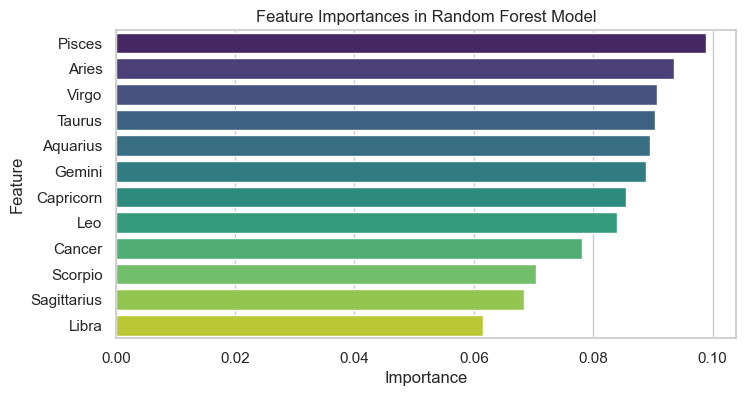

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample feature importances and feature names from the user's model output
feature_importances = [0.098937, 0.093613, 0.090732, 0.090329, 0.089578, 0.088891, 0.085442,
                       0.083939, 0.078068, 0.070495, 0.068372, 0.061603]
features = ['Pisces', 'Aries', 'Virgo', 'Taurus', 'Aquarius', 'Gemini', 'Capricorn', 
            'Leo', 'Cancer', 'Scorpio', 'Sagittarius', 'Libra']

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': features, 
    'Importance': feature_importances
})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



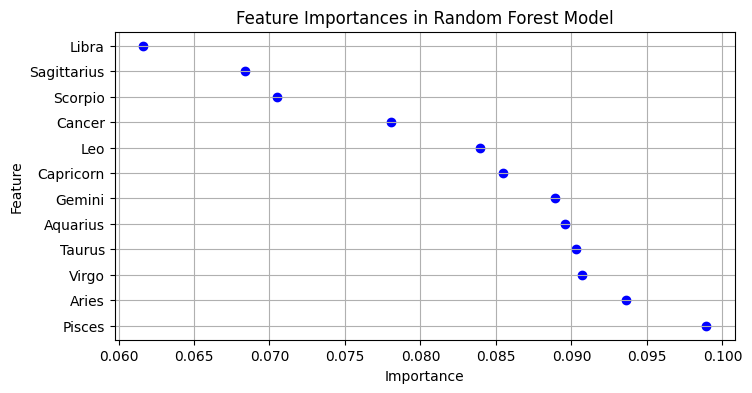

In [19]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sample feature importances and feature names from the user's model output
feature_importances = [0.098937, 0.093613, 0.090732, 0.090329, 0.089578, 0.088891, 0.085442,
                       0.083939, 0.078068, 0.070495, 0.068372, 0.061603]
features = ['Pisces', 'Aries', 'Virgo', 'Taurus', 'Aquarius', 'Gemini', 'Capricorn', 
            'Leo', 'Cancer', 'Scorpio', 'Sagittarius', 'Libra']

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': features, 
    'Importance': feature_importances
})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances using a dot plot instead of a barplot
plt.figure(figsize=(8, 4))
plt.scatter(features_df['Importance'], features_df['Feature'], color='blue')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


### 使用Support Vector Machine, SVM

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [21]:
# Load the dataset
data= pd.read_csv('Win_Lose_Data.csv')
data

,match_api_id,team_api_id,team_type,spread,status,fire,water,earth,air,Aries,...,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius,TeamGoal
0,836306,8640,home,10,win,3,1,2,5,1,...,1,0,0,0,1,1,3,1,1,10
1,2030233,8633,home,8,win,3,4,3,1,1,...,3,0,1,1,1,1,0,0,1,10
2,658797,8586,home,8,win,4,1,1,5,2,...,0,1,0,0,0,1,0,1,4,9
3,840289,9925,home,9,win,3,3,1,4,1,...,1,0,2,1,0,0,0,0,4,9
4,1239709,9823,home,7,win,3,1,3,4,1,...,0,1,0,0,2,1,0,3,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31947,2216664,8429,away,1,lose,2,3,4,2,1,...,2,0,1,2,0,2,1,1,0,0
31948,2216666,8485,away,1,lose,4,4,2,1,2,...,2,1,1,0,1,1,0,0,1,0
31949,2216667,8284,home,4,lose,4,4,0,3,1,...,0,1,3,0,0,0,0,1,2,0
31950,2216670,8485,away,4,lose,3,5,2,1,2,...,2,2,1,0,1,1,0,0,1,0


In [22]:
# Convert 'status' column to binary (win = 1, lose and draw = 0)
data['status'] = data['status'].apply(lambda x: 1 if x == 'win' else 0)

In [23]:
# number of rows & columns in the dataset
data.shape

(31952, 22)

In [24]:
# first 5 rows of the dataset
data.head()

,match_api_id,team_api_id,team_type,spread,status,fire,water,earth,air,Aries,...,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius,TeamGoal
0,836306,8640,home,10,1,3,1,2,5,1,...,1,0,0,0,1,1,3,1,1,10
1,2030233,8633,home,8,1,3,4,3,1,1,...,3,0,1,1,1,1,0,0,1,10
2,658797,8586,home,8,1,4,1,1,5,2,...,0,1,0,0,0,1,0,1,4,9
3,840289,9925,home,9,1,3,3,1,4,1,...,1,0,2,1,0,0,0,0,4,9
4,1239709,9823,home,7,1,3,1,3,4,1,...,0,1,0,0,2,1,0,3,1,9


In [25]:
# checking for missing values
data.isnull().sum()

match_api_id    0
team_api_id     0
team_type       0
spread          0
status          0
fire            0
water           0
earth           0
air             0
Aries           0
Leo             0
Sagittarius     0
Cancer          0
Scopio          0
Pisces          0
Taurus          0
Virgo           0
Capricorn       0
Gemini          0
Libra           0
Aquarius        0
TeamGoal        0
dtype: int64

In [26]:
# Select the zodiac sign columns (F to U) and the win rate column (E)
zodiac_columns = ['Aries', 'Leo', 'Sagittarius', 'Cancer', 'Scopio', 'Pisces', 'Taurus', 'Virgo', 'Capricorn', 'Gemini', 'Libra', 'Aquarius']
target_column = 'status'

zodiac_columns

['Aries',
 'Leo',
 'Sagittarius',
 'Cancer',
 'Scopio',
 'Pisces',
 'Taurus',
 'Virgo',
 'Capricorn',
 'Gemini',
 'Libra',
 'Aquarius']

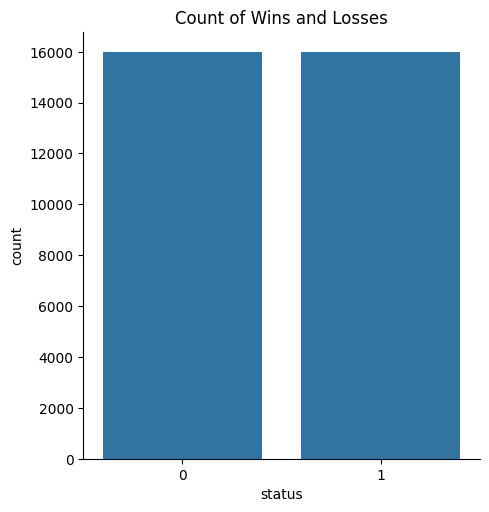

In [27]:
# Data Analysis and Visualization
# Number of values for each status
sns.catplot(x='status', data=data, kind='count')
plt.title('Count of Wins and Losses')
plt.show()

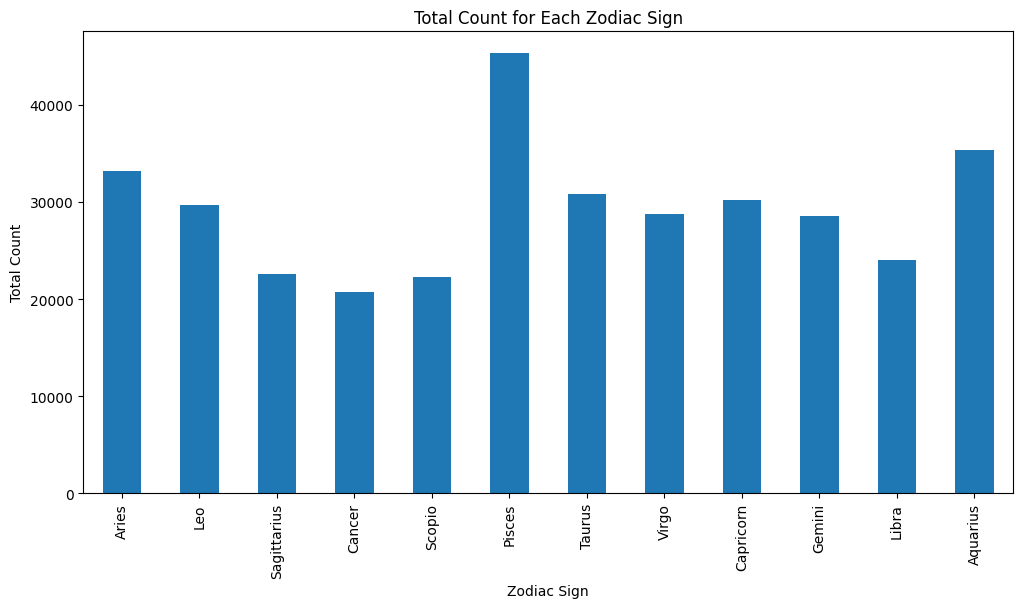

In [28]:
# Calculate the total for each zodiac sign across all rows
zodiac_totals = data[zodiac_columns].sum()

# Plotting the bar chart for zodiac sign totals
zodiac_totals.plot(kind='bar', figsize=(12, 6))
plt.title('Total Count for Each Zodiac Sign')
plt.xlabel('Zodiac Sign')
plt.ylabel('Total Count')
plt.show()

In [29]:
# Splitting the dataset into features (X) and target (Y)
X = data[zodiac_columns]
Y = data[target_column]

print("Class distribution in the dataset:\n", data[target_column].value_counts())

Class distribution in the dataset:
 status
1    15976
0    15976
Name: count, dtype: int64


Train & Test Split

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Checking the distribution in the training and testing sets
train_distribution = Y_train.value_counts()
test_distribution = Y_test.value_counts()

print("Class distribution in training set:\n", train_distribution)
print("Class distribution in testing set:\n", test_distribution)

Class distribution in training set:
 status
0    12800
1    12761
Name: count, dtype: int64
Class distribution in testing set:
 status
1    3215
0    3176
Name: count, dtype: int64


In [31]:
# Training the model using SVM
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, Y_train)


SVC(class_weight='balanced', random_state=42)

Model Evaluation

In [32]:
# Model Evaluation
# Accuracy score on training data
Y_train_pred = svm_model.predict(X_train)
accuracy_train = accuracy_score(Y_train, Y_train_pred)
print(f"Accuracy on Training Data: {accuracy_train:.2f}")

# Accuracy score on testing data
Y_test_pred = svm_model.predict(X_test)
accuracy_test = accuracy_score(Y_test_pred,Y_test )
print(f"Accuracy on Testing Data: {accuracy_test:.2f}")

Accuracy on Training Data: 0.60
Accuracy on Testing Data: 0.54


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate precision, recall, F1 score, and overall accuracy
precision = precision_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Overall Accuracy: {accuracy:.2f}")

Precision: 0.55
Recall: 0.52
F1 Score: 0.53
Overall Accuracy: 0.54


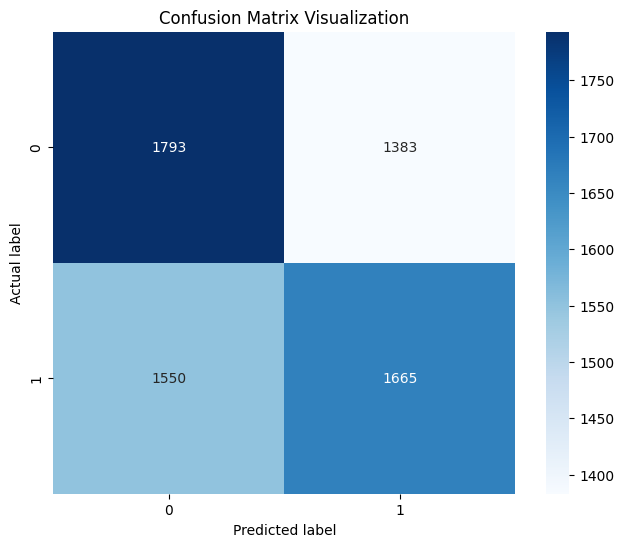

In [34]:
cm = confusion_matrix(Y_test, Y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix Visualization')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

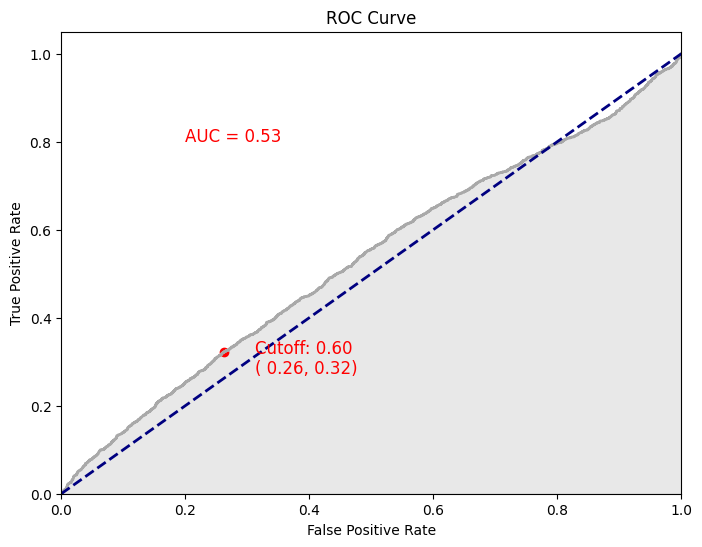

In [35]:
# Finding the optimal cutoff point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_point = (fpr[optimal_idx], tpr[optimal_idx])

plt.figure(figsize=(8, 6))
plt.fill_between(fpr, tpr, color='lightgray', alpha=0.5)  # Fill the AUC area with light gray
plt.plot(fpr, tpr, color='darkgray', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(*optimal_point, color='red')

# Annotating the AUC on the plot
plt.text(0.2, 0.8, f'AUC = {roc_auc:.2f}', fontsize=12, color='red')

# Annotating the optimal point (cutoff value) and its coordinates on the plot
cutoff_annotation = f'Cutoff: {optimal_threshold:.2f}\n( {optimal_point[0]:.2f}, {optimal_point[1]:.2f})'
plt.text(optimal_point[0] + 0.05, optimal_point[1] - 0.05, cutoff_annotation, fontsize=12, color='red')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
# Define the input data: counts of each zodiac sign in a team
input_data = (2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0)

# Convert the input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data to fit the model's expectation for a single sample prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Use the model to make a prediction
prediction = svm_model.predict(input_data_reshaped)
print("Prediction:", prediction)

# Output the prediction result ('Win' or 'Lose')
# The prediction is 'Win' if the predicted label is 1, else 'Lose'
if prediction[0] == 1:
    print('Win')
else:
    print('Lose')

Prediction: [1]
Win


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### 使用GradientBoostingClassifier

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('Win_Lose_Data.csv')
data 

,match_api_id,team_api_id,team_type,spread,status,fire,water,earth,air,Aries,...,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius,TeamGoal
0,836306,8640,home,10,win,3,1,2,5,1,...,1,0,0,0,1,1,3,1,1,10
1,2030233,8633,home,8,win,3,4,3,1,1,...,3,0,1,1,1,1,0,0,1,10
2,658797,8586,home,8,win,4,1,1,5,2,...,0,1,0,0,0,1,0,1,4,9
3,840289,9925,home,9,win,3,3,1,4,1,...,1,0,2,1,0,0,0,0,4,9
4,1239709,9823,home,7,win,3,1,3,4,1,...,0,1,0,0,2,1,0,3,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31947,2216664,8429,away,1,lose,2,3,4,2,1,...,2,0,1,2,0,2,1,1,0,0
31948,2216666,8485,away,1,lose,4,4,2,1,2,...,2,1,1,0,1,1,0,0,1,0
31949,2216667,8284,home,4,lose,4,4,0,3,1,...,0,1,3,0,0,0,0,1,2,0
31950,2216670,8485,away,4,lose,3,5,2,1,2,...,2,2,1,0,1,1,0,0,1,0


In [3]:
data.head()

,match_api_id,team_api_id,team_type,spread,status,fire,water,earth,air,Aries,...,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius,TeamGoal
0,836306,8640,home,10,win,3,1,2,5,1,...,1,0,0,0,1,1,3,1,1,10
1,2030233,8633,home,8,win,3,4,3,1,1,...,3,0,1,1,1,1,0,0,1,10
2,658797,8586,home,8,win,4,1,1,5,2,...,0,1,0,0,0,1,0,1,4,9
3,840289,9925,home,9,win,3,3,1,4,1,...,1,0,2,1,0,0,0,0,4,9
4,1239709,9823,home,7,win,3,1,3,4,1,...,0,1,0,0,2,1,0,3,1,9


In [40]:
data.shape

(31952, 22)

In [41]:
data.describe()

,match_api_id,team_api_id,spread,fire,water,earth,air,Aries,Leo,Sagittarius,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius,TeamGoal
count,3.195200e+04,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.00000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000
mean,1.252028e+06,9975.271751,1.834690,2.675545,2.763239,2.810153,2.751064,1.039497,0.929019,0.707029,0.647909,0.69764,1.417689,0.966012,0.899286,0.944855,0.894529,0.751471,1.105064,1.489015
std,4.804389e+05,13076.150502,1.062782,1.422129,1.409624,1.452495,1.421784,0.984531,0.951436,0.842379,0.811697,0.81264,1.108373,0.939986,0.922524,0.938449,0.894773,0.840350,1.002302,1.330682
min,4.831300e+05,1601.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.402048e+05,8530.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.227849e+06,9747.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.712665e+06,9911.000000,2.000000,4.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,2.216671e+06,274581.000000,10.000000,9.000000,9.000000,9.000000,10.000000,6.000000,7.000000,5.000000,5.000000,5.00000,7.000000,7.000000,7.000000,5.000000,7.000000,5.000000,6.000000,10.000000


In [19]:
# Convert 'status' column to binary (win = 1, lose and draw = 0)
data['status'] = data['status'].apply(lambda x: 1 if x == 'win' else 0)

In [20]:
# Select the zodiac sign columns (F to U) and the win rate column (E)
zodiac_columns = ['Aries', 'Leo', 'Sagittarius', 'Cancer', 'Scopio', 'Pisces', 'Taurus', 'Virgo', 'Capricorn', 'Gemini', 'Libra', 'Aquarius']
target_column = 'status'

zodiac_columns

['Aries',
 'Leo',
 'Sagittarius',
 'Cancer',
 'Scopio',
 'Pisces',
 'Taurus',
 'Virgo',
 'Capricorn',
 'Gemini',
 'Libra',
 'Aquarius']

In [21]:
# Splitting the dataset into features (X) and target (Y)
X = data[zodiac_columns]
Y = data[target_column]

print("Class distribution in the dataset:\n", data[target_column].value_counts())

Class distribution in the dataset:
 status
1    15976
0    15976
Name: count, dtype: int64


In [22]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model using Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [23]:
# Predicting on the test set
X_test_prediction = gb_model.predict(X_test)

In [24]:
# Model Evaluation
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))
conf_mat = confusion_matrix(Y_test, X_test_prediction)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53      3176
           1       0.53      0.51      0.52      3215

    accuracy                           0.53      6391
   macro avg       0.53      0.53      0.53      6391
weighted avg       0.53      0.53      0.53      6391



In [25]:
report = classification_report(Y_test, X_test_prediction, output_dict=True)
# Extracting specific performance metrics
category_0_precision = report['0']['precision']
category_0_recall = report['0']['recall']
category_0_f1 = report['0']['f1-score']

category_1_precision = report['1']['precision']
category_1_recall = report['1']['recall']
category_1_f1 = report['1']['f1-score']

overall_accuracy = report['accuracy']

print(f"Category 0 (Loss) - Precision: {category_0_precision:.2f}, Recall: {category_0_recall:.2f}, F1 Score: {category_0_f1:.2f}")
print(f"Category 1 (Win) - Precision: {category_1_precision:.2f}, Recall: {category_1_recall:.2f}, F1 Score: {category_1_f1:.2f}")
print(f"Overall Accuracy: {overall_accuracy:.2f}")

Category 0 (Loss) - Precision: 0.52, Recall: 0.55, F1 Score: 0.53
Category 1 (Win) - Precision: 0.53, Recall: 0.51, F1 Score: 0.52
Overall Accuracy: 0.53


In [26]:
from sklearn.metrics import accuracy_score
# accuracy on test data
X_test_prediction = gb_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.5271475512439368


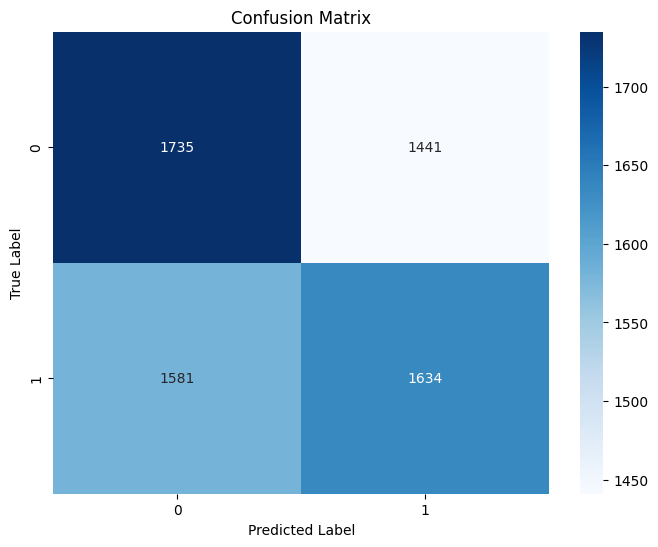

In [15]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
# Define the input data: counts of each zodiac sign in a team
input_data = (1, 1, 1, 1, 0, 0, 0, 1, 1, 3, 1, 1)

# Convert the input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data to fit the model's expectation for a single sample prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Use the trained model to make a prediction
prediction = gb_model.predict(input_data_reshaped)
prediction_proba = gb_model.predict_proba(input_data_reshaped)

print("Prediction:", prediction)
print("Probability of each class:", prediction_proba)

# Assuming prediction is the output from your model
if prediction[0] == 1:
    print("The prediction indicates a win.")
else:
    print("The prediction indicates a loss.")

Prediction: [0]
Probability of each class: [[0.5066387 0.4933613]]
The prediction indicates a loss.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


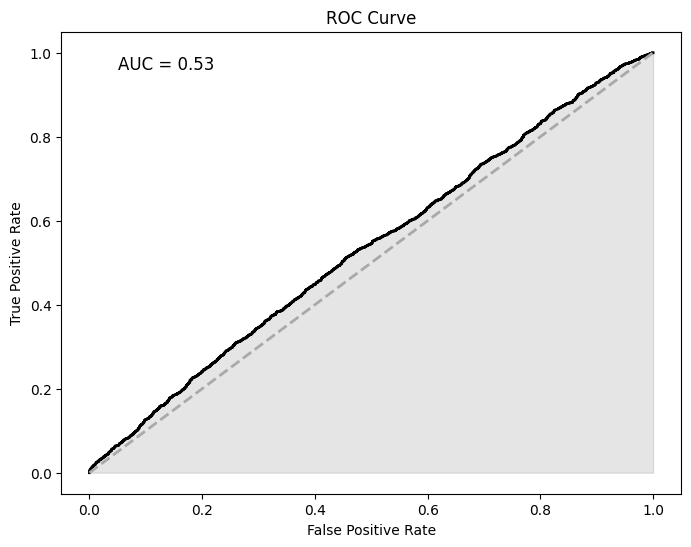

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class from another model
Y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold (closest to top-left corner)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2)  # Change the line color to black
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='grey')  # Fill area under the curve
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Display AUC on the plot
plt.text(0.05, 0.95, f'AUC = {roc_auc:.2f}', fontsize=12, va='bottom', ha='left')

# Mark and label the optimal threshold on the plot
#plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red')
# Adjust the text to place the threshold value before the coordinates and add an offset
#offset = 0.03  # Offset to prevent overlap with the ROC curve point
#plt.text(fpr[optimal_idx] + offset, tpr[optimal_idx] - offset, 
     #    f'{optimal_threshold:.2f}({fpr[optimal_idx]:.2f}, {tpr[optimal_idx]:.2f})',
      #   fontsize=12, va='bottom', ha='left', color='red')

plt.show()


In [55]:
# Extracting feature importances
feature_importances = gb_model.feature_importances_

# Creating a DataFrame for easier visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the most important features
print(features_df)

        Feature  Importance
5        Pisces    0.128647
7         Virgo    0.117502
10        Libra    0.100382
2   Sagittarius    0.099079
11     Aquarius    0.094990
4        Scopio    0.091041
1           Leo    0.090481
9        Gemini    0.065738
3        Cancer    0.060116
6        Taurus    0.055931
8     Capricorn    0.055370
0         Aries    0.040724


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_12371/1662106054.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


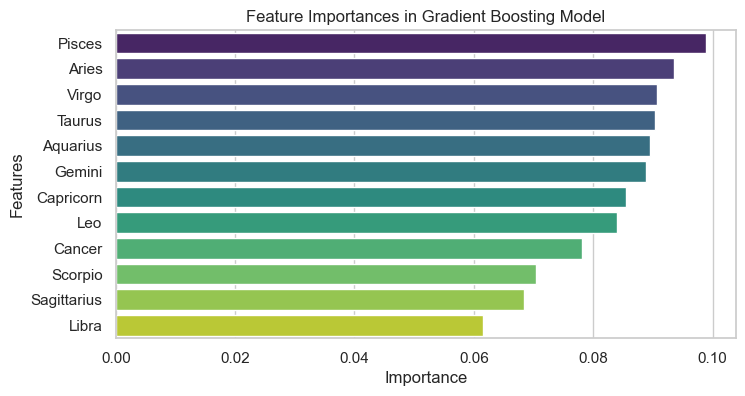

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')

# Adding title and labels
plt.title('Feature Importances in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Features')

# Displaying the plot
plt.show()


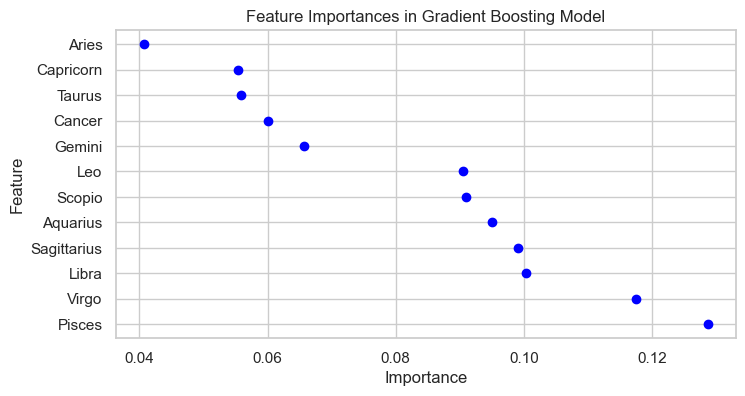

In [57]:
# Given the actual feature importances provided by the user, let's create a dot plot using that data.

# Creating a DataFrame for the provided feature importances
actual_features_df = pd.DataFrame({
    'Feature': ['Pisces', 'Virgo', 'Libra', 'Sagittarius', 'Aquarius', 'Scopio', 
                'Leo', 'Gemini', 'Cancer', 'Taurus', 'Capricorn', 'Aries'],
    'Importance': [0.128647, 0.117502, 0.100382, 0.099079, 0.094990, 0.091041, 
                   0.090481, 0.065738, 0.060116, 0.055931, 0.055370, 0.040724]
})

# Sorting the DataFrame by the 'Importance' column
actual_features_df = actual_features_df.sort_values(by='Importance', ascending=False)

# Creating the dot plot for the actual feature importances
plt.figure(figsize=(8, 4))
plt.scatter(actual_features_df['Importance'], actual_features_df['Feature'], color='blue')
plt.title('Feature Importances in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()
